Contents:

The goal of this analyisis is to exaimne purchasing behaviors among customers. Key questions in the project brief such as busiest days of the week and hours of the day among others will be answered. 

01. Data imported
02. Address PII
03. A column based on regions was created
04. 'low-activity' customers have been removed from the data
05. Customer profiles for more-relevant marketing
06. Visualizations for the customer profiles 
07. Customer profiles have been aggregated
08. Customer behavior across regions

# 01.

In [1]:
#imported libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Career Foundry Instacart'

In [3]:
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared', 'orders_products_customers.pkl'))

In [4]:
pd.options.display.max_columns = None

In [5]:
df.shape

(32434212, 32)

In [6]:
df.head()

user_id first_name   Surname  gender     state  age date_joined  \
0    26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
1    26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
2    26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
3    26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
4    26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   

   dependants fam_status  income  order_id  order_number  order_dow  \
0           3    married  165665   2543867             5          1   
1           3    married  165665   1285508             7          5   
2           3    married  165665   2578584             8          1   
3           3    married  165665    423547             2          2   
4           3    married  165665   2524893             3          3   

   order_hour_of_day  days_since_prior_order  product_id  add_to_cart_order  \
0                  9                    30.0         196                  2   
1                 15                    11.0         196                  1   
2                 15                    10.0         196                  2   
3                  9                    14.0       38928                  1   
4                 11                    30.0       38928                  1   

   reordered _merge              product_name  aisle_id  department_id  \
0          0   both                      Soda        77              7   
1          1   both                      Soda        77              7   
2          1   both                      Soda        77              7   
3          0   both  0% Greek Strained Yogurt       120             16   
4          1   both  0% Greek Strained Yogurt       120             16   

   prices    price_range_loc     busiest_day busiest_hours  max_order  \
0     9.0  Mid-range product    Busiest Days   Most Orders          8   
1     9.0  Mid-range product  Regularly Busy   Most Orders          8   
2     9.0  Mid-range product    Busiest Days   Most Orders          8   
3    12.6  Mid-range product  Regularly Busy   Most Orders          8   
4    12.6  Mid-range product      Least Busy   Most Orders          8   

   loyalty_flag  mean_price spender_flag  median_frequency    frequency_flag  
0  New customer    7.988889  Low Spender              19.0  Regular Customer  
1  New customer    7.988889  Low Spender              19.0  Regular Customer  
2  New customer    7.988889  Low Spender              19.0  Regular Customer  
3  New customer    7.988889  Low Spender              19.0  Regular Customer  
4  New customer    7.988889  Low Spender              19.0  Regular Customer

# 02.

In this data set there are multiple columns which can be considered personally identifiable information. Namly the first_name and last_name columns. User_id will be used instead of customers first and last names.

# 03.

In [7]:
data1 = {'state':['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey', 'Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri', 'Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana', 'Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon','California', 'Hawaii'],
        'region':['1','1','1','1','1','1','1','1','1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3','3', '3', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4']}

In [8]:
df_1 = pd.DataFrame(data1)

In [9]:
df = df.merge(df_1, on = 'state')

In [10]:
df.groupby('region').agg({'prices': ['sum']})

prices
               sum
region            
1       44602964.8
2       59277424.8
3       84233999.6
4       64693170.8

We can see that region 3 made up the most sales. Followed by regions 4, 2, 1.

# 04.

In [11]:
df.drop(df[df.max_order < 5].index, inplace=True)

In [12]:
df.groupby('region').agg({'prices': ['sum']})

prices
               sum
region            
1       42586794.6
2       56655315.9
3       80477212.9
4       61840111.4

Customers with less than 5 orders have been removed from the data set. 

# 05.

In [13]:
df.loc[df['age'] <= 39, 'age_group'] = 'young adult'
df.loc[(df['age'] <= 59 ) & (df['age'] > 39), 'age_group'] = 'middle age adult' 
df.loc[df['age'] > 59, 'age_group'] = 'senior adult'

In [14]:
df['age_group'].value_counts(dropna = False)

young adult         10674650
senior adult        10583941
middle age adult     9734073
Name: age_group, dtype: int64

Customers have been broken down into three groups based on age. 

In [15]:
df.loc[df['income'] <= 53413, 'income_group'] = 'low income'
df.loc[(df['income'] <= 156600 ) & (df['income'] > 53413), 'income_group'] = 'middle income' 
df.loc[df['income'] > 156600, 'income_group'] = 'upper income'

In [16]:
df['income_group'].value_counts(dropna = False)

middle income    24231478
low income        4027368
upper income      2733818
Name: income_group, dtype: int64

Customers have been broken down into three groups based on income.

In [17]:
result = []

for value in df['department_id']:
  if value == 5:
    result.append("drink alcohol")
  else:
    result.append("do not drink")

In [18]:
df['drink_alcohol'] = result

In [19]:
df['drink_alcohol'].value_counts(dropna = False)

do not drink     30847990
drink alcohol      144674
Name: drink_alcohol, dtype: int64

Customers have been broken down based on if they drink alcohol or don't drink.

In [20]:
result = []

for value in df['department_id']:
  if value == 12:
    result.append("meat eater")
  else:
    result.append("non-meat eater")

In [21]:
df['meat_eater'] = result

In [22]:
df['meat_eater'].value_counts(dropna = False)

non-meat eater    30317879
meat eater          674785
Name: meat_eater, dtype: int64

Customers have been broken down into two groups based on if they order meat through instacart. Some non-meat eaters may eat meat just not order it through a grocery delivery service

In [23]:
result = []

for value in df["dependants"]:
  if value == 0:
    result.append("no dependents")
  elif value == 1:
    result.append("young parent")
  else:
    result.append("older parent")

In [24]:
df['parental_status'] = result

In [25]:
df['parental_status'].value_counts(dropna = False)

older parent     15519651
no dependents     7747032
young parent      7725981
Name: parental_status, dtype: int64

Customers have been broken down into 3 groups based on their parental status.

In [26]:
df['fam_status'].value_counts(dropna = False)

married                             21763021
single                               5099271
divorced/widowed                     2647761
living with parents and siblings     1482611
Name: fam_status, dtype: int64

# 06.

<AxesSubplot:>

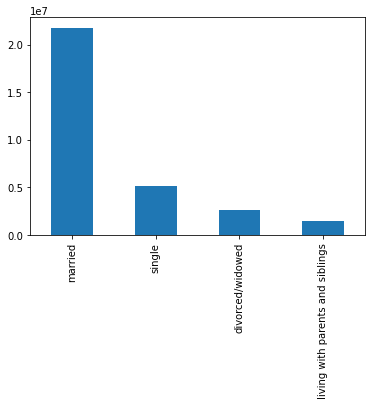

In [27]:
df['fam_status'].value_counts().plot.bar()

<AxesSubplot:>

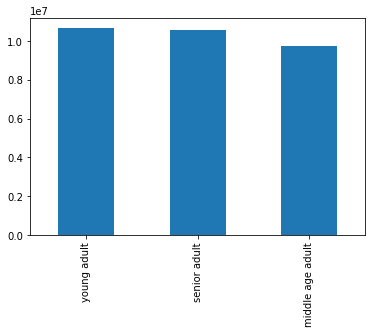

In [28]:
df['age_group'].value_counts().plot.bar()

<AxesSubplot:>

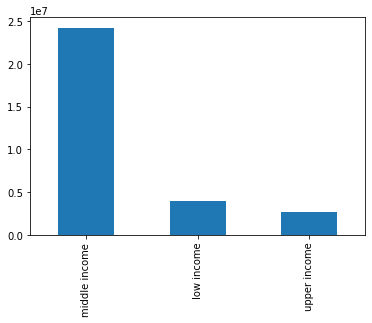

In [29]:
df['income_group'].value_counts().plot.bar()

<AxesSubplot:>

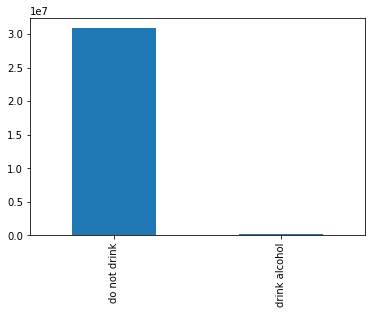

In [30]:
df['drink_alcohol'].value_counts().plot.bar()

<AxesSubplot:>

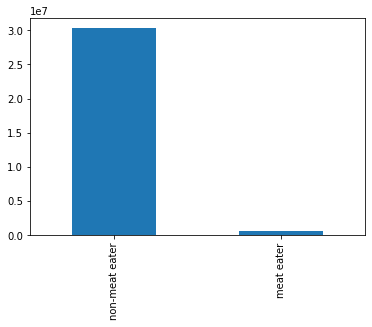

In [31]:
df['meat_eater'].value_counts().plot.bar()

<AxesSubplot:>

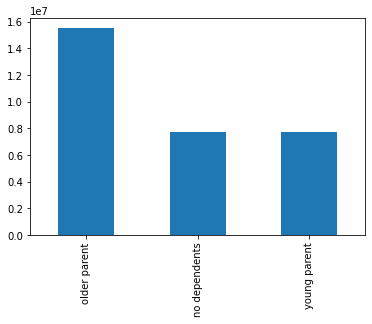

In [32]:
df['parental_status'].value_counts().plot.bar()

# 07.

In [33]:
df.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                   mean  min   max
age_group                                         
middle age adult              10.819718  0.0  30.0
senior adult                  10.800991  0.0  30.0
young adult                   10.811221  0.0  30.0

In [34]:
df.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                      mean  min   max
age_group                            
middle age adult  7.796423  1.0  25.0
senior adult      7.800166  1.0  25.0
young adult       7.789483  1.0  25.0

In [35]:
df.groupby('income_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                mean  min   max
income_group                                   
low income                 11.140346  0.0  30.0
middle income              10.772501  0.0  30.0
upper income               10.662511  0.0  30.0

In [36]:
df.groupby('meat_eater').agg({'prices': ['mean', 'min', 'max']})

prices           
                     mean  min   max
meat_eater                          
meat eater      16.300062  8.0  25.0
non-meat eater   7.605990  1.0  20.0

In [37]:
df.groupby('meat_eater').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                 mean  min   max
meat_eater                                      
meat eater                  11.123666  0.0  30.0
non-meat eater              10.803439  0.0  30.0

In [38]:
df.groupby('parental_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                     mean  min   max
parental_status                     
no dependents    7.794471  1.0  25.0
older parent     7.793127  1.0  25.0
young parent     7.800540  1.0  25.0

In [39]:
df.groupby('parental_status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                  mean  min   max
parental_status                                  
no dependents                10.791750  0.0  30.0
older parent                 10.823844  0.0  30.0
young parent                 10.802080  0.0  30.0

# 08.

In [40]:
pd.crosstab(df['region'], df['meat_eater'])

meat_eater  meat eater  non-meat eater
region                                
1               118572         5351496
2               158261         7109446
3               224122        10096340
4               173830         7760597

<AxesSubplot:xlabel='region'>

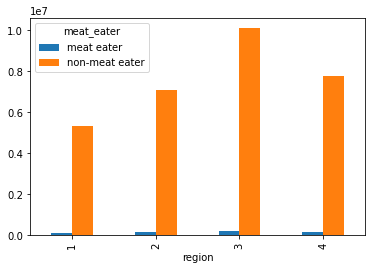

In [41]:
pd.crosstab(df['region'], df['meat_eater']).plot.bar()

In [42]:
pd.crosstab(df['region'], df['income_group'])

income_group  low income  middle income  upper income
region                                               
1                 718131        4275668        476269
2                 938932        5692969        635806
3                1365200        8034361        920901
4                1005105        6228480        700842

<AxesSubplot:xlabel='region'>

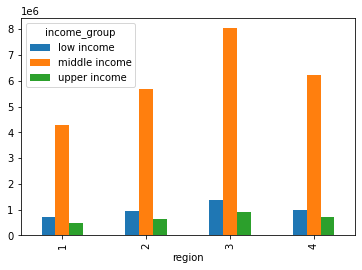

In [43]:
pd.crosstab(df['region'], df['income_group']).plot.bar()

In [44]:
pd.crosstab(df['region'], df['drink_alcohol'])

drink_alcohol  do not drink  drink alcohol
region                                    
1                   5445034          25034
2                   7233655          34052
3                  10271640          48822
4                   7897661          36766

<AxesSubplot:xlabel='region'>

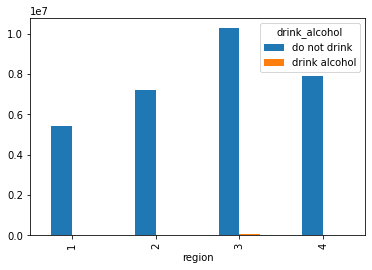

In [45]:
pd.crosstab(df['region'], df['drink_alcohol']).plot.bar()

In [46]:
pd.crosstab(df['region'], df['age_group'])

age_group  middle age adult  senior adult  young adult
region                                                
1                   1710462       1886052      1873554
2                   2325092       2457349      2485266
3                   3184413       3524584      3611465
4                   2514106       2715956      2704365

<AxesSubplot:xlabel='region'>

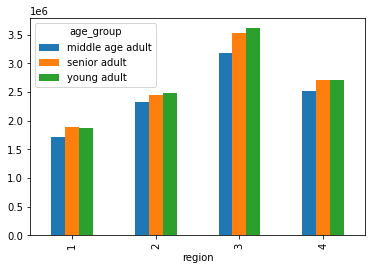

In [47]:
pd.crosstab(df['region'], df['age_group']).plot.bar()

In [48]:
pd.crosstab(df['region'], df['parental_status'])

parental_status  no dependents  older parent  young parent
region                                                    
1                      1355828       2735844       1378396
2                      1824487       3600373       1842847
3                      2584352       5194148       2541962
4                      1982365       3989286       1962776

<AxesSubplot:xlabel='region'>

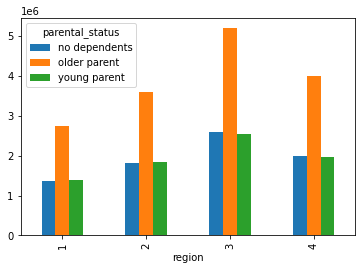

In [49]:
pd.crosstab(df['region'], df['parental_status']).plot.bar()

If we cross tab the customer profiles with the regions there is no behaviors that differentiates them from each other. All the customer profiles follow the same trend, starting at region 3 followed by 4, 2, 1. 

In [71]:
df.to_pickle(os.path.join(path, 'Sent to Client', 'orders_products_customers.pkl'))